In [18]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [20]:
data=pd.read_csv('/kaggle/input/ad-click-prediction-dataset/ad_click_dataset.csv')

In [21]:
data.describe()

,id,age,click
count,10000.000000,5234.000000,10000.000000
mean,5060.211400,40.197363,0.650000
std,2861.758265,13.126420,0.476993
min,5.000000,18.000000,0.000000
25%,2529.000000,29.000000,0.000000
50%,5218.000000,39.500000,1.000000
75%,7466.000000,52.000000,1.000000
max,10000.000000,64.000000,1.000000


In [22]:
data.head()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,670,User670,22.0,NaN,Desktop,Top,Shopping,Afternoon,1
1,3044,User3044,NaN,Male,Desktop,Top,NaN,NaN,1
2,5912,User5912,41.0,Non-Binary,NaN,Side,Education,Night,1
3,5418,User5418,34.0,Male,NaN,NaN,Entertainment,Evening,1
4,9452,User9452,39.0,Non-Binary,NaN,NaN,Social Media,Morning,0


In [23]:
data.shape

(10000, 9)

In [24]:
print(data.columns)

Index(['id', 'full_name', 'age', 'gender', 'device_type', 'ad_position',
       'browsing_history', 'time_of_day', 'click'],
      dtype='object')


In [25]:
# Print row numbers as a list
print(list(data.index))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,

In [26]:
data.dtypes

id                    int64
full_name            object
age                 float64
gender               object
device_type          object
ad_position          object
browsing_history     object
time_of_day          object
click                 int64
dtype: object

In [27]:
data.isnull()

,id,full_name,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,False,False,False,True,False,False,False,False,False
1,False,False,True,False,False,False,True,True,False
2,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,True,False,False,False
4,False,False,False,False,True,True,False,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,True,True,False,False,False,True,False
9996,False,False,True,False,False,False,False,True,False
9997,False,False,True,False,False,False,True,False,False
9998,False,False,True,True,False,True,False,False,False


In [28]:
# Print columns with missing values
missing_values = data.isnull().sum()
print(missing_values[missing_values > 0])

age                 4766
gender              4693
device_type         2000
ad_position         2000
browsing_history    4782
time_of_day         2000
dtype: int64


In [29]:
missing_summary = data.isnull().mean() * 100

print(missing_summary[missing_summary > 0])

age                 47.66
gender              46.93
device_type         20.00
ad_position         20.00
browsing_history    47.82
time_of_day         20.00
dtype: float64


In [30]:
# Drop non-predictive features
data = data.drop(['id', 'full_name'], axis=1)

In [31]:
# Handle missing values
data['age'] = data['age'].fillna(data['age'].mean())

In [32]:

# Define features and target
X = data.drop('click', axis=1)
y = data['click']


In [33]:
# Define categorical and numerical columns
categorical_features = ['gender', 'device_type', 'ad_position', 'browsing_history', 'time_of_day']
numerical_features = ['age']


In [34]:
# Create transformers for preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])


In [35]:
# Define base models
base_models = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('decision_tree', DecisionTreeClassifier()),
    ('random_forest', RandomForestClassifier())
]


In [36]:
# Define the meta model
meta_model = LogisticRegression()


In [37]:
# Create the stacking ensemble model
stacking_model = StackingClassifier(
    estimators=base_models,
    final_estimator=meta_model,
    n_jobs=-1
)

In [38]:
# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('stacking', stacking_model)
])


In [39]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [40]:

# Train the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age']),
                                                 ('cat', OneHotEncoder(),
                                                  ['gender', 'device_type',
                                                   'ad_position',
                                                   'browsing_history',
                                                   'time_of_day'])])),
                ('stacking',
                 StackingClassifier(estimators=[('logreg',
                                                 LogisticRegression(max_iter=1000)),
                                                ('decision_tree',
                                                 DecisionTreeClassifier()),
                                                ('random_forest',
                                                 RandomForestClassifier())],
                                    final_estimator=LogisticRegression(),
                                    n_jobs=-1))])

In [41]:

# Make predictions
y_pred = pipeline.predict(X_test)


In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


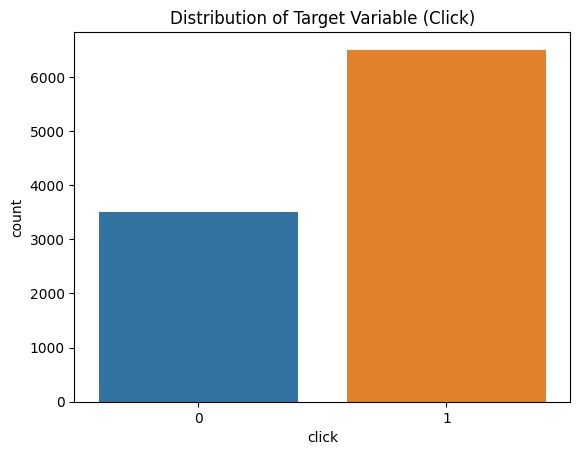

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='click', data=data)
plt.title('Distribution of Target Variable (Click)')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


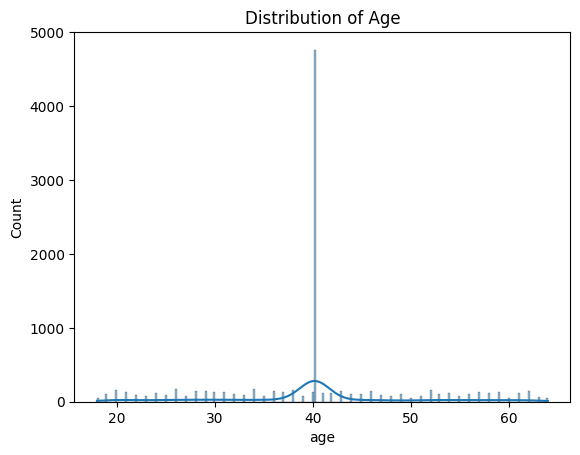

In [44]:
# Plot the distribution of the 'age' feature
sns.histplot(data['age'].dropna(), kde=True)
plt.title('Distribution of Age')
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


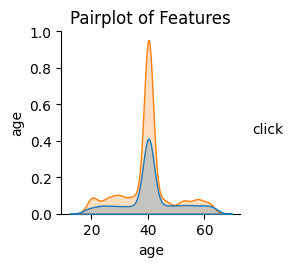

In [45]:
# Subset of features for pairplot
subset_data = data[['age', 'click']]  # Adjust according to available features
sns.pairplot(subset_data, hue='click')
plt.title('Pairplot of Features')
plt.show()


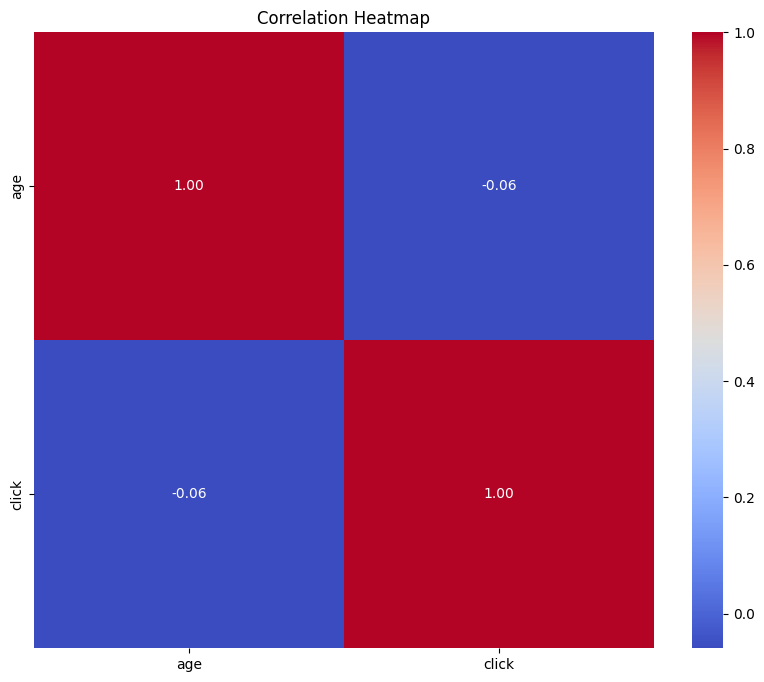

In [46]:
# Select numeric columns only
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
corr = numeric_data.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


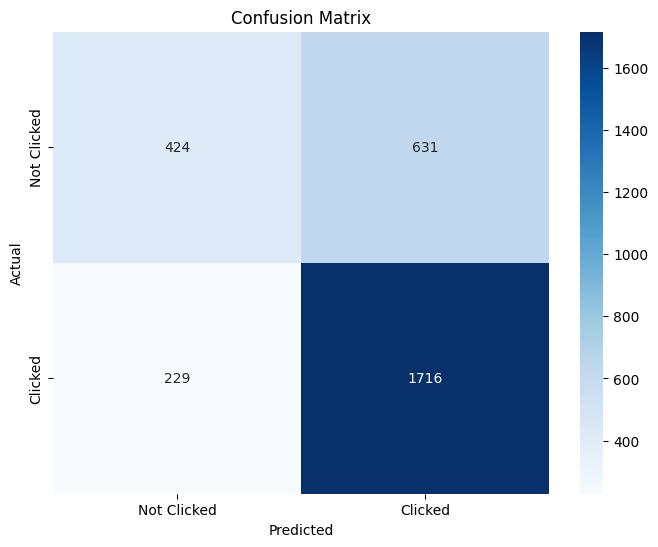

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


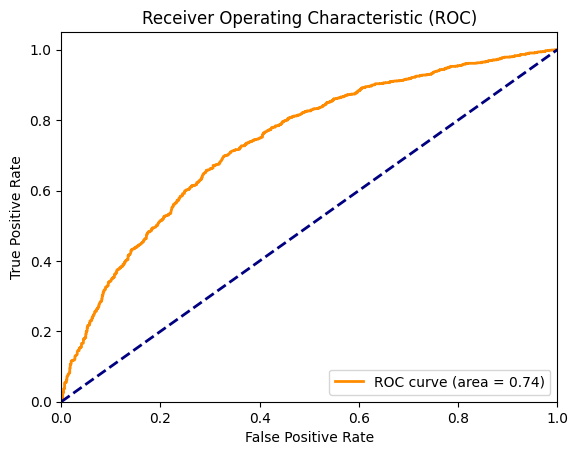

In [48]:
from sklearn.metrics import roc_curve, auc

# Get predictions and probabilities
y_proba = pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()
